In [3]:
import pandas as pd
import os


## You need to download QRSVX data from Morningstar or use the one from blackboard directly.

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/cozywind2010/WinthropFinance/master/QRSVX%20returns.csv')

In [6]:
data.head()

,Name,Queens Road Small Cap Value,Morningstar US Small Value NR USD,Russell 2000 Pure Value TR USD,Mkt-RF,SMB,HML,RF
0,2010-3,5.34,8.06,11.58,6.31,1.43,2.10,0.01
1,2010-4,4.63,5.17,10.51,2.00,4.98,2.81,0.01
2,2010-5,-4.87,-7.70,-10.65,-7.89,0.05,-2.38,0.01
3,2010-6,-5.53,-7.94,-10.63,-5.56,-1.98,-4.50,0.01
4,2010-7,5.95,7.64,6.72,6.93,0.17,-0.26,0.01


In [7]:
data.columns = ["date", "QRSVX", "M-index", "R-index","Mkt-Rf","SMB","HML","Rf"]

In [8]:
data.head()

,date,QRSVX,M-index,R-index,Mkt-Rf,SMB,HML,Rf
0,2010-3,5.34,8.06,11.58,6.31,1.43,2.10,0.01
1,2010-4,4.63,5.17,10.51,2.00,4.98,2.81,0.01
2,2010-5,-4.87,-7.70,-10.65,-7.89,0.05,-2.38,0.01
3,2010-6,-5.53,-7.94,-10.63,-5.56,-1.98,-4.50,0.01
4,2010-7,5.95,7.64,6.72,6.93,0.17,-0.26,0.01


In [9]:
!pip install statsmodels patsy

In [10]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## We are working on getting a CAPM model here

In [11]:
x= data["Mkt-Rf"]
y = data["QRSVX"]

In [12]:
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  QRSVX   R-squared (uncentered):                   0.794
Model:                            OLS   Adj. R-squared (uncentered):              0.792
Method:                 Least Squares   F-statistic:                              409.6
Date:                Wed, 30 Sep 2020   Prob (F-statistic):                    3.36e-38
Time:                        03:03:57   Log-Likelihood:                         -199.94
No. Observations:                 107   AIC:                                      401.9
Df Residuals:                     106   BIC:                                      404.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-Rf         0.7904      0.039     20.238      0.000       0.713       0.868
==============================================================================
Omnibus:                        0.189   Durbin-Watson:                   2.304
Prob(Omnibus):                  0.910   Jarque-Bera (JB):                0.238
Skew:                           0.097   Prob(JB):                        0.888
Kurtosis:                       2.875   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Code below shows you how to do Fama-French three factor model

In [13]:
x= data[["Mkt-Rf","SMB","HML"]]
y = data["QRSVX"]

In [14]:
data.head()

,date,QRSVX,M-index,R-index,Mkt-Rf,SMB,HML,Rf
0,2010-3,5.34,8.06,11.58,6.31,1.43,2.10,0.01
1,2010-4,4.63,5.17,10.51,2.00,4.98,2.81,0.01
2,2010-5,-4.87,-7.70,-10.65,-7.89,0.05,-2.38,0.01
3,2010-6,-5.53,-7.94,-10.63,-5.56,-1.98,-4.50,0.01
4,2010-7,5.95,7.64,6.72,6.93,0.17,-0.26,0.01


In [15]:
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  QRSVX   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              359.8
Date:                Wed, 30 Sep 2020   Prob (F-statistic):                    9.44e-55
Time:                        03:03:58   Log-Likelihood:                         -154.47
No. Observations:                 107   AIC:                                      314.9
Df Residuals:                     104   BIC:                                      323.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-Rf         0.6691      0.028     24.057      0.000       0.614       0.724
SMB            0.5183      0.047     11.034      0.000       0.425       0.611
HML            0.1606      0.047      3.442      0.001       0.068       0.253
==============================================================================
Omnibus:                        8.514   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               10.891
Skew:                           0.414   Prob(JB):                      0.00432
Kurtosis:                       4.326   Cond. No.                         1.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## now let's look at rolling regression analysis


In [16]:
!pip install pyfinance

     |████████████████████████████████| 61kB 1.9MB/s 


In [19]:
!pip install pyfinance
!pip install 'pandas==1.0.4'
from pyfinance.ols import OLS, RollingOLS, PandasRollingOLS

     |████████████████████████████████| 10.1MB 2.7MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.0.4 which is incompatible.
  Found existing installation: pandas 1.1.2
    Uninstalling pandas-1.1.2:
      Successfully uninstalled pandas-1.1.2


In [22]:

from pyfinance.ols import OLS, RollingOLS, PandasRollingOLS
# %%
x= data["Mkt-Rf"]
y = data["QRSVX"]
window = 12  # months
model = PandasRollingOLS(y=y, x=x, window=window)
print(model.beta.head())

    feature1
11  0.847561
12  0.850478
13  0.838429
14  0.915396
15  0.880677


In [24]:
x= data[["Mkt-Rf","SMB","HML"]]
y = data["QRSVX"]
window = 12  # months
model = PandasRollingOLS(y=y, x=x, window=window)

print(model.beta.head()) 

      Mkt-Rf       SMB       HML
11  0.688054  0.683820  0.027332
12  0.693759  0.665692  0.038993
13  0.665689  0.730498  0.103278
14  0.697191  0.697105  0.087223
15  0.681632  0.709350  0.108035


# The code below shows the change of loadings on Market, Size, and Value for QRSVX along years.

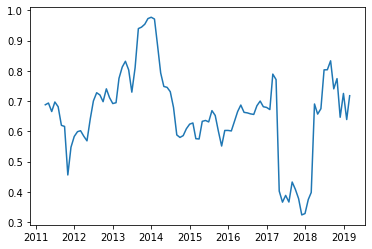

In [36]:
import matplotlib.pyplot as plt

beta = pd.DataFrame(data = model.beta)
# %%
beta["date"] = pd.date_range('2011-03-01', periods = len(beta), freq= 'm')
plt.plot(beta['date'],beta['Mkt-Rf'])


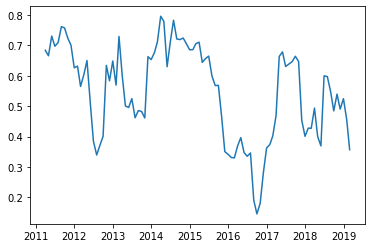

In [37]:
plt.plot(beta['date'],beta['SMB'])

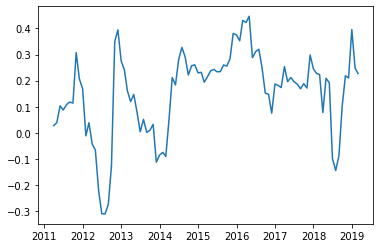

In [38]:
plt.plot(beta['date'],beta['HML'])